In [1]:
import tensorflow as tf
from glob import glob
from os.path import join
from tensorflow.keras import layers, models
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imports.GDL_layers as GDL_layers

In [2]:
# Find a list of all the datafiles
patch_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/"
patch_files = sorted(glob(join(patch_path, "*.nc")))
patch_ds = xr.open_dataset(patch_files[0])
csv_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/"
csv_files = sorted(glob(join(csv_path, "track_step_*.csv")))
meta_ds = pd.read_csv(csv_files[0])

In [3]:
patch_ds

<xarray.Dataset>
Dimensions:           (p: 370, row: 144, col: 144)
Coordinates:
  * p                 (p) int32 0 1 2 3 4 5 6 7 ... 363 364 365 366 367 368 369
  * row               (row) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
  * col               (col) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
Data variables: (12/26)
    lon               (p, row, col) float32 ...
    lat               (p, row, col) float32 ...
    i                 (p, row, col) int32 ...
    j                 (p, row, col) int32 ...
    x                 (p, row, col) float32 ...
    y                 (p, row, col) float32 ...
    ...                ...
    MLCAPE_prev       (p, row, col) float32 ...
    USHR6_prev        (p, row, col) float32 ...
    VSHR6_prev        (p, row, col) float32 ...
    SBLCL_prev        (p, row, col) float32 ...
    U_BUNK_prev       (p, row, col) float32 ...
    V_BUNK_prev       (p, row, col) float32 ...
Attributes: (12/36)
    Conventions:             CF-1.6
    title:                   NCARSTORM Storm Patches for run 20101024-0000 me...
    object_variable:         REFL_COM
    start_hour:              12
    end_hour:                35
    HRRR_alt_end_hour:       46
    ...                      ...
    single_step:             True
    label_type:              gamma
    model_map_file:          /glade/work/cbecker/hagelslag/mapfiles/ncar_stor...
    mask_file:               None
    run_date_format:         %Y%m%d-%H%M
    json:                    False

In [4]:
meta_ds

,Step_ID,Track_ID,Ensemble_Name,Ensemble_Member,Run_Date,Valid_Date,Forecast_Hour,Valid_Hour_UTC,Duration,Centroid_Lon,...,eccentricity,major_axis_length,minor_axis_length,orientation,Matched,Max_Hail_Size,Num_Matches,Shape,Location,Scale
0,d01_REFL_COM_20101024-0000_12_13_000_00,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-98.41019,...,0.90735,51.23550,21.53869,1.41172,0,0,0,0,0,0
1,d01_REFL_COM_20101024-0000_12_13_000_01,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-97.69198,...,0.85356,26.92719,14.02906,1.13923,0,0,0,0,0,0
2,d01_REFL_COM_20101024-0000_12_12_001_00,d01_REFL_COM_20101024-0000_12_12_001,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-95.15486,...,0.71815,8.65894,6.02569,0.74301,0,0,0,0,0,0
3,d01_REFL_COM_20101024-0000_12_13_002_00,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-94.39792,...,0.58687,7.89825,6.39509,-1.28875,0,0,0,0,0,0
4,d01_REFL_COM_20101024-0000_12_13_002_01,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-94.21008,...,0.91899,27.65443,10.90375,0.32912,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,d01_REFL_COM_20101024-0000_35_35_238_00,d01_REFL_COM_20101024-0000_35_35_238,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.94177,...,0.44428,6.31100,5.65396,1.29480,0,0,0,0,0,0
366,d01_REFL_COM_20101024-0000_35_35_239_00,d01_REFL_COM_20101024-0000_35_35_239,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.16997,...,0.85947,79.05277,40.41106,0.12811,0,0,0,0,0,0
367,d01_REFL_COM_20101024-0000_35_35_240_00,d01_REFL_COM_20101024-0000_35_35_240,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-88.18374,...,0.92145,18.05184,7.01316,0.99009,0,0,0,0,0,0
368,d01_REFL_COM_20101024-0000_35_35_241_00,d01_REFL_COM_20101024-0000_35_35_241,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-82.50549,...,0.93744,14.44305,5.02817,-0.19595,0,0,0,0,0,0


In [33]:
# Pull selected variables from patch files and join into a single DataSet
num_files = 100
train_split = int(num_files*0.7)
val_split = int(num_files*0.8)
variables = ["REFL_COM_curr"]
data_list = []
for p, patch_file in enumerate(patch_files[0:train_split]):
    if p % 10 == 0:
        print(f'Train {p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_train = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)
data_list = []
for p, patch_file in enumerate(patch_files[train_split:val_split]):
    if p % 10 == 0:
        print(f'Validation {train_split + p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_val = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)
data_list = []
for p, patch_file in enumerate(patch_files[val_split:num_files]):
    if p % 10 == 0:
        print(f'Test {val_split + p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_test = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)

Train 0, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20101024-0000_d01_model_patches.nc
Train 10, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110201-0000_d01_model_patches.nc
Train 20, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110326-0000_d01_model_patches.nc
Train 30, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110414-0000_d01_model_patches.nc
Train 40, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110425-0000_d01_model_patches.nc
Train 50, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110522-0000_d01_model_patches.nc
Train 60, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110605-0000_d01_model_patches.nc
Validation 70, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110615-0000_d01_model_patches.nc
Test 80, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTO

In [8]:
# Pull variables from csv files and join into an array
csv_variables = ["major_axis_length", "minor_axis_length"]
csv_data_list = []
for p, csv_file in enumerate(csv_files[0:train_split]):
    if p % 10 == 0:
        print(f'Train {p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_train = xr.concat(csv_data_list, dim="p").to_array().transpose()
csv_data_list = []
for p, csv_file in enumerate(csv_files[train_split:val_split]):
    if p % 10 == 0:
        print(f'Validation {train_split + p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_val = xr.concat(csv_data_list, dim="p").to_array().transpose()
csv_data_list = []
for p, csv_file in enumerate(csv_files[val_split:num_files]):
    if p % 10 == 0:
        print(f'Test {val_split + p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_test = xr.concat(csv_data_list, dim="p").to_array().transpose()

Train 0, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20101024-0000.csv
Train 10, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110201-0000.csv
Train 20, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110326-0000.csv
Train 30, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110414-0000.csv
Train 40, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110425-0000.csv
Train 50, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110522-0000.csv
Train 60, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110605-0000.csv
Validation 70, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110615-0000.csv
Test 80, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCA

In [34]:
print(input_train.shape)
print(input_val.shape)
print(input_test.shape)
print(output_train.shape)
print(output_val.shape)
print(output_test.shape)

(17733, 144, 144, 1)
(5857, 144, 144, 1)
(9813, 144, 144, 1)
(17733, 2)
(5857, 2)
(9813, 2)


In [40]:
# Normalize the training data
scale_stats = pd.DataFrame(index=[0], columns=["mean", "sd"])
scale_stats.loc[0, "mean"] = input_train.mean()
scale_stats.loc[0, "sd"] = input_train.std()
input_train_norm = (input_train - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]
input_val_norm = (input_val - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]
input_test_norm = (input_test - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [41]:
# Normalize output data
output_scale_stats = pd.DataFrame(index=[0], columns=["mean", "sd"])
output_scale_stats.loc[0, "mean"] = output_train.mean()
output_scale_stats.loc[0, "sd"] = output_train.std()
output_train_norm = (output_train - output_scale_stats.loc[0, "mean"]) / output_scale_stats.loc[0, "sd"]
output_val_norm = (output_val - output_scale_stats.loc[0, "mean"]) / output_scale_stats.loc[0, "sd"]
output_test_norm = (output_test - output_scale_stats.loc[0, "mean"]) / output_scale_stats.loc[0, "sd"]

In [42]:
gdl_model = models.Sequential()
gdl_model.add(GDL_layers.RotEquivConv2D(32, (3, 3), rot_axis=False, input_shape=(144, 144, 1)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(32, (3, 3)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(128, (3, 3)))
gdl_model.add(GDL_layers.RotInvPool())
gdl_model.add(layers.Flatten())
gdl_model.add(layers.Dense(32, activation='relu'))
gdl_model.add(layers.Dense(2))

2022-07-13 11:47:11.086863: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-13 11:47:14.106890: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30988 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:62:00.0, compute capability: 7.0


In [43]:
gdl_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d (RotEquivC  (None, 142, 142, 4, 32)  320       
 onv2D)                                                          
                                                                 
 rot_equiv_pool2d (RotEquivP  (None, 71, 71, 4, 32)    0         
 ool2D)                                                          
                                                                 
 rot_equiv_conv2d_1 (RotEqui  (None, 69, 69, 4, 32)    9248      
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_1 (RotEqui  (None, 34, 34, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_2 (RotEqui  (None, 32, 32, 4, 64)    1

In [45]:
gdl_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [46]:
gdl_history = gdl_model.fit(x=input_train_norm, y=output_train, epochs=10, validation_data=(input_val_norm, output_val))

Epoch 1/10


2022-07-13 11:47:44.744295: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


555/555 [==============================] - 62s 69ms/step - loss: 354.2426 - mse: 354.2426 - val_loss: 111.2954 - val_mse: 111.2954
Epoch 2/10
555/555 [==============================] - 38s 68ms/step - loss: 211.8002 - mse: 211.8002 - val_loss: 97.6750 - val_mse: 97.6750
Epoch 3/10
555/555 [==============================] - 38s 68ms/step - loss: 150.8294 - mse: 150.8294 - val_loss: 57.9649 - val_mse: 57.9649
Epoch 4/10
555/555 [==============================] - 38s 68ms/step - loss: 111.1823 - mse: 111.1823 - val_loss: 45.3365 - val_mse: 45.3365
Epoch 5/10
555/555 [==============================] - 38s 68ms/step - loss: 79.2446 - mse: 79.2446 - val_loss: 56.6403 - val_mse: 56.6403
Epoch 6/10
555/555 [==============================] - 38s 68ms/step - loss: 58.4623 - mse: 58.4623 - val_loss: 37.8060 - val_mse: 37.8060
Epoch 7/10
555/555 [==============================] - 38s 68ms/step - loss: 44.4098 - mse: 44.4098 - val_loss: 36.4781 - val_mse: 36.4781
Epoch 8/10
555/555 [===============

In [47]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(layers.Dense(2))

In [48]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 71, 71, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)      

In [49]:
cnn_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [50]:
cnn_history = cnn_model.fit(x=input_train_norm, y=output_train, epochs=10, validation_data=(input_val_norm, output_val))

Epoch 1/10
555/555 [==============================] - 8s 13ms/step - loss: 348.6913 - mse: 348.6913 - val_loss: 154.7900 - val_mse: 154.7900
Epoch 2/10
555/555 [==============================] - 7s 13ms/step - loss: 233.6818 - mse: 233.6818 - val_loss: 402.6257 - val_mse: 402.6257
Epoch 3/10
555/555 [==============================] - 7s 13ms/step - loss: 187.8533 - mse: 187.8533 - val_loss: 137.1676 - val_mse: 137.1676
Epoch 4/10
555/555 [==============================] - 7s 13ms/step - loss: 151.1733 - mse: 151.1733 - val_loss: 108.0549 - val_mse: 108.0549
Epoch 5/10
555/555 [==============================] - 7s 13ms/step - loss: 123.5265 - mse: 123.5265 - val_loss: 70.0533 - val_mse: 70.0533
Epoch 6/10
555/555 [==============================] - 7s 13ms/step - loss: 100.0716 - mse: 100.0716 - val_loss: 73.6779 - val_mse: 73.6779
Epoch 7/10
555/555 [==============================] - 7s 13ms/step - loss: 84.5771 - mse: 84.5771 - val_loss: 57.4283 - val_mse: 57.4283
Epoch 8/10
555/555 [=

(0.0, 421.57719974517823)

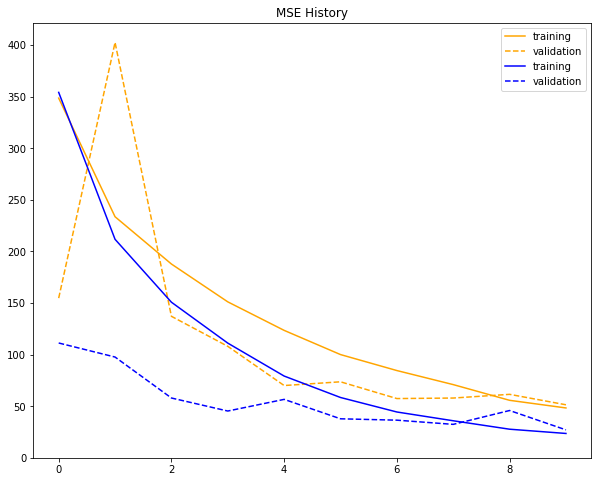

In [66]:
F, ax = plt.subplots(figsize=(10, 8))
ax = plt.gca()
a = ax.plot(cnn_history.history['mse'], label='training', color='orange')
b = ax.plot(cnn_history.history['val_mse'], label='validation', color='orange', linestyle='dashed')
c = ax.plot(gdl_history.history['mse'], label='training', color='blue')
d = ax.plot(gdl_history.history['val_mse'], label='validation', color='blue', linestyle='dashed')
ax.legend()
ax.set_title("MSE History")
ax.set_ylim(bottom=0)

In [67]:
gdl_model.evaluate(input_test_norm, output_test)

307/307 [==============================] - 7s 22ms/step - loss: 24.0421 - mse: 24.0421


[24.042116165161133, 24.042116165161133]

In [68]:
cnn_model.evaluate(input_test_norm, output_test)

307/307 [==============================] - 2s 7ms/step - loss: 41.2398 - mse: 41.2398


[41.23975372314453, 41.23975372314453]

In [69]:
latent_predictor = tf.keras.Model(gdl_model.inputs, gdl_model.layers[-2].output)

In [91]:
gdl_l_preds = latent_predictor.predict(input_test_norm)

307/307 [==============================] - 7s 21ms/step


In [90]:
latent_predictor.predict(np.rot90(input_test_norm, 1, axes=(1, 2)))

307/307 [==============================] - 6s 19ms/step


(9813, 32)

In [74]:
cnn_latent_predictor = tf.keras.Model(cnn_model.inputs, cnn_model.layers[-2].output)

In [92]:
cnn_l_preds = cnn_latent_predictor.predict(np.rot90(input_test_norm, 0, axes=(1, 2)))

307/307 [==============================] - 1s 2ms/step


In [80]:
cnn_latent_predictor.predict(np.rot90(input_test_norm[0:1], 3, axes=(1, 2)))

1/1 [==============================] - 0s 14ms/step


array([[ 0.       ,  0.       ,  0.       , 26.145985 ,  9.125082 ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       , 16.605816 ,
         0.       ,  0.       ,  5.9073825,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        15.164137 , 17.195192 , 10.073872 ,  0.       , 15.803284 ,
         0.       , 10.73082  ]], dtype=float32)

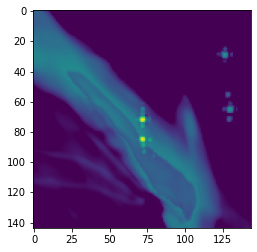

In [82]:
plt.imshow(input_test_norm[0:1][0, :, :, 0])

In [103]:
gdl_uniq, gdl_counts = np.unique(gdl_l_preds.nonzero()[0], return_counts=True)
gdl_counts.mean()

3.178029145011719

In [119]:
np.unique(gdl_l_preds.nonzero()[1])

array([ 1,  4,  5, 12, 14, 18, 19, 23, 24, 27, 31])

In [104]:
cnn_uniq, cnn_counts = np.unique(cnn_l_preds.nonzero()[0], return_counts=True)
cnn_counts.mean()

9.598491796596353

In [117]:
np.unique(cnn_l_preds.nonzero()[1]).shape

(18,)

In [108]:
gdl_train_pred = latent_predictor.predict(input_train_norm)

555/555 [==============================] - 12s 21ms/step


In [109]:
cnn_train_pred = cnn_latent_predictor.predict(input_train_norm)

555/555 [==============================] - 3s 6ms/step


In [111]:
gdl_train_uniq, gdl_train_counts = np.unique(gdl_train_pred.nonzero()[0], return_counts=True)
gdl_train_counts.mean()

3.7495629617098065

In [120]:
np.unique(gdl_train_pred.nonzero()[1])

array([ 1,  4,  5, 12, 14, 18, 19, 23, 24, 27, 31])

In [113]:
cnn_train_uniq, cnn_train_counts = np.unique(cnn_train_pred.nonzero()[0], return_counts=True)
cnn_train_counts.mean()

10.053798003721875

In [118]:
np.unique(cnn_train_pred.nonzero()[1]).shape

(18,)